In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
tb=pd.read_excel('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Python/linearR.xlsx')

In [4]:
tb


,no. of tv ads,no. of car sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


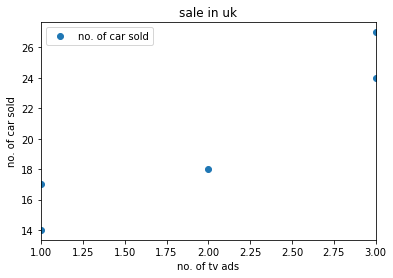

In [5]:
tb.plot('no. of tv ads','no. of car sold',style='o')
plt.ylabel('no. of car sold')
plt.title('sale in uk')
plt.show()




In [6]:
t=tb['no. of tv ads']
c=tb['no. of car sold']


In [7]:
import statsmodels.api as s
t=s.add_constant(t)
model=sm.OLS(c,t)
result=model.fit()
print(result.summary())

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        no. of car sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Thu, 04 Jun 2020   Prob (F-statistic):             0.0190
Time:                        22:03:06   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0000      2.366      4.226

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


prediction interval

In [8]:
from statsmodels.stats.outliers_influence import summary_table
st,data,ss2=summary_table(result,alpha=0.05)
fittedvalues=data[:,2]
predict_mean_se=data[:,3]
predict_mean_ci_low,predict_mean_ci_upp=data[:,4:6].T
predict_ci_low,predict_ci_upp=data[:,6:8].T

In [9]:
predict_mean_ci_low

array([10.38819716, 20.38819716, 16.92546477, 10.38819716, 20.38819716])

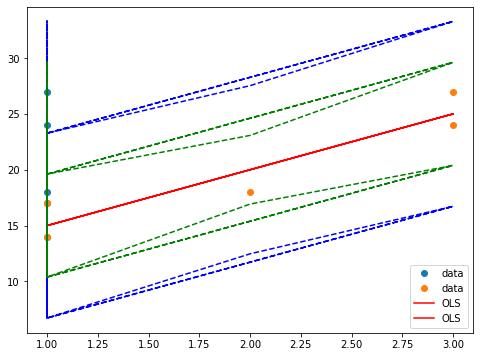

In [13]:
t=s.add_constant(t)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(t,c,'o',label="data")
ax.plot(t,fittedvalues,'r-',label='OLS')
ax.plot(t,predict_ci_low,'b--')
ax.plot(t,predict_ci_upp,'b--')
ax.plot(t,predict_mean_ci_low,'g--')
ax.plot(t,predict_mean_ci_upp,'g--')
ax.legend(loc='best')
plt.show()